In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs, make_classification
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [2]:
n_samples=1000
X, y = make_blobs(n_samples=1000,  cluster_std=0.4, n_features=5, centers=5)

In [3]:
pipeline = Pipeline([
    ('pca', PCA(n_components=3)),
    ('KMeans', KMeans(n_clusters=5))
])

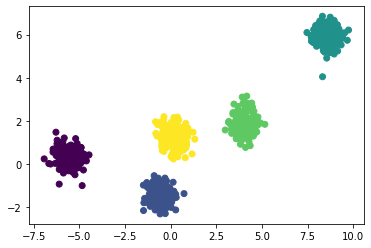

In [4]:
fig, ax = plt.subplots()
y_pred = pipeline.fit_predict(X)
ax.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()    

## Parte 2: ottimizzazione iperparametri con grid search su DBSCAN

In [5]:
parameters = {
    'eps': np.arange(0.05, 0.5, 0.05),
    'min_samples': np.arange(10, 20)
}

scaler = StandardScaler()
X = scaler.fit_transform(X)

pars_pairs = itertools.product(parameters['eps'], parameters['min_samples'])

opt_vals = ()
ars = 0
for pars_pair in pars_pairs:
    dbscan = DBSCAN(eps=pars_pair[0], min_samples=pars_pair[1]).fit(X)
    y_pred = dbscan.labels_
    ars_ = adjusted_rand_score(y, y_pred)
    if ars_ > ars:
        ars = ars_
        opt_vals = (pars_pair)


print(ars)
print(opt_vals)

1.0
(0.4, 10)


## Parte 3: gridsearchcv

In [6]:
parameters = {
    'max_depth': np.arange(1, 11)
}

In [10]:
X, y = make_classification(n_samples=10000)

dt = DecisionTreeClassifier()
clf = GridSearchCV(dt, parameters)
clf.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [11]:
clf.best_params_

{'max_depth': 4}

In [12]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

0.908 (+/-0.011) for {'max_depth': 1}
0.935 (+/-0.003) for {'max_depth': 2}
0.946 (+/-0.010) for {'max_depth': 3}
0.946 (+/-0.007) for {'max_depth': 4}
0.944 (+/-0.004) for {'max_depth': 5}
0.943 (+/-0.006) for {'max_depth': 6}
0.940 (+/-0.006) for {'max_depth': 7}
0.938 (+/-0.005) for {'max_depth': 8}
0.935 (+/-0.008) for {'max_depth': 9}
0.934 (+/-0.007) for {'max_depth': 10}
